In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from eda import EDA

### Load and preprocess data

In [2]:
eda = EDA()

In [3]:
df = eda.load_data("../data/BrentOilPrices.csv")

/Users/hazel/Desktop/Self Study/kiam8/oil-changepoint-analysis/notebooks/../src/eda.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


### Brent Oil Prices Over Time

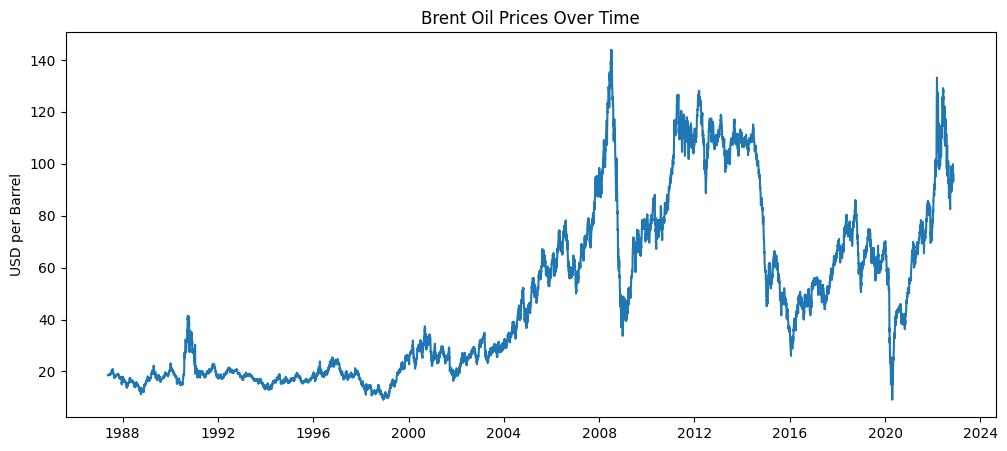

In [4]:
# Price plot
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Prices Over Time")
plt.ylabel("USD per Barrel")
plt.show()

The plot shows long-term growth with sharp spikes corresponding to crises such as the 2008 financial crash and the 2020 COVID-19 pandemic.

### Log Returns
Log returns stabilize the series, making it suitable for change point modeling. Volatility clustering is evident during major market shocks.

In [5]:
df = eda.compute_log_returns(df)

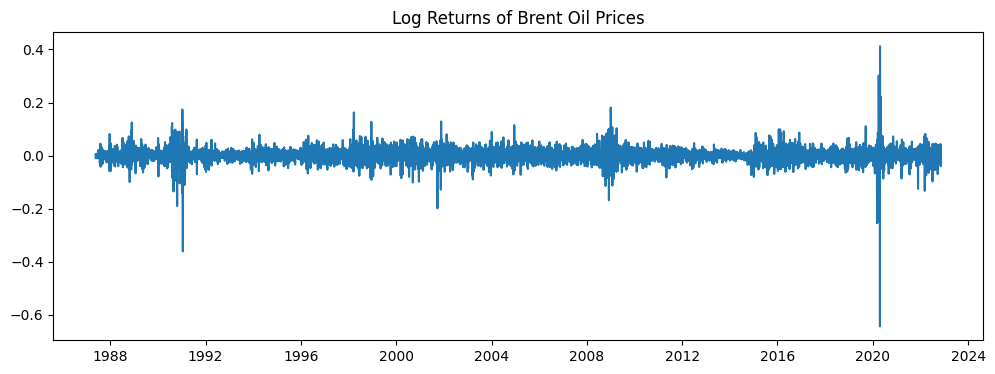

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil Prices")
plt.show()

### 30-Day Rolling Volatility

In [7]:
df = eda.compute_rolling_volatility(df)

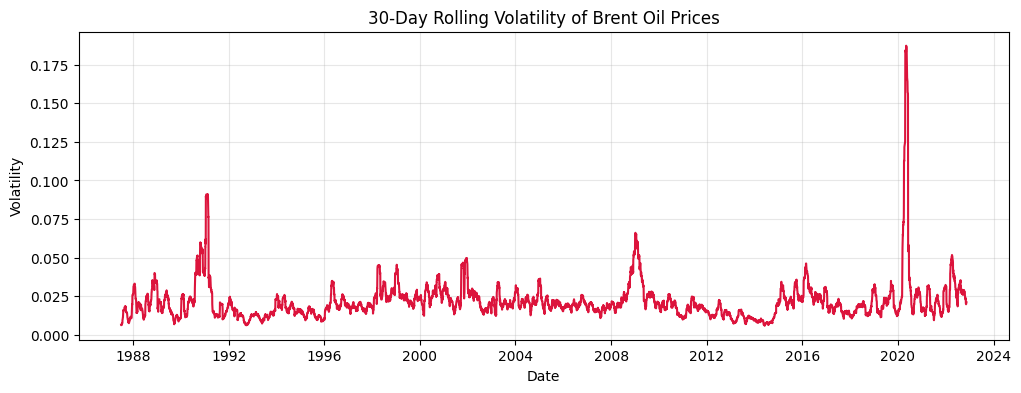

In [8]:
plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["volatility"], color="crimson")
plt.title("30-Day Rolling Volatility of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(alpha=0.3)
plt.show()

Volatility peaks align with geopolitical and economic events, highlighting periods of market stress.

### Stationarity Testing (Augmented Dickey-Fuller Test)

To assess whether the Brent oil price time series is stationary, the Augmented Dickey-Fuller (ADF) test was applied to both the raw price series and the log return series. Stationarity is a key requirement for many time series models, as non-stationary data can lead to spurious results.

In [9]:
eda.adf_test(df['Price'], col_name='Price')

ADF Test for Price
  ADF Statistic: -1.9939
  p-value: 0.2893
  Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
  => The series is non-stationary


In [10]:
eda.adf_test(df['log_return'], col_name='Log Returns')

ADF Test for Log Returns
  ADF Statistic: -16.4271
  p-value: 0.0000
  Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
  => The series is stationary


The ADF test results indicate that the raw Brent oil price series is non-stationary, reflecting long-term trends and structural shifts driven by macroeconomic and geopolitical factors. In contrast, the log return series is stationary, with a statistically significant p-value below the 5% threshold. This suggests that price changes, rather than price levels, are more suitable for statistical modeling.

Based on these results, subsequent change point analysis focuses on log returns and volatility measures, which better capture regime shifts and structural breaks in Brent oil price dynamics.